In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df = pd.read_csv (r'/Users/sehan/Documents/Data_Collection-26-08/encoded2.csv')
display(df)

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,54,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,1215885,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.0,186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215886,1215886,3,0.235607,0.235607,0.235607,0.235607,0.235607,0.235607,186.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215887,1215887,764,0.099927,0.099927,0.099927,0.099927,0.099927,0.099927,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1215888,1215888,3,1.307852,1.307852,1.307852,1.307852,1.307852,1.307852,186.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
df = df.iloc[: , 1:]

In [4]:
display(df)

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,sTtl,...,54,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,58.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,58.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.0,186.0,252.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215886,3,0.235607,0.235607,0.235607,0.235607,0.235607,0.235607,186.0,40.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215887,764,0.099927,0.099927,0.099927,0.099927,0.099927,0.099927,0.0,0.0,64.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1215888,3,1.307852,1.307852,1.307852,1.307852,1.307852,1.307852,186.0,40.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df = df.drop(columns=['Attack Tool', 'Label', 'sVid', 'dVid', '54'])

In [6]:
df = df.fillna(df.median())

In [7]:
display(df)

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,sTtl,...,52,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,58.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,58.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,0.0,0.0,117.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.0,186.0,252.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215886,3,0.235607,0.235607,0.235607,0.235607,0.235607,0.235607,186.0,40.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215887,764,0.099927,0.099927,0.099927,0.099927,0.099927,0.099927,0.0,0.0,64.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1215888,3,1.307852,1.307852,1.307852,1.307852,1.307852,1.307852,186.0,40.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
X = df.drop("Attack Type",1)   #Feature Matrix
y = df["Attack Type"]          #Target Variable

In [9]:
#test and train split (30% for test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

In [10]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data 

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,sTtl,...,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan,Attack Type
422235,102981,2.581060,2.581060,2.581060,2.581060,2.581060,2.581060,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
100416,47461,4.550162,4.550162,4.550162,4.550162,4.550162,4.550162,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,UDPFlood
6588,6306,0.190589,0.190589,0.190589,0.190589,0.190589,0.190589,0.0,0.0,64.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
314850,109186,2.581985,2.581985,2.581985,2.581985,2.581985,2.581985,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
1139122,29563,2.527121,2.527121,2.527121,2.527121,2.527121,2.527121,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,HTTPFlood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,69775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
152315,41896,4.556148,4.556148,4.556148,4.556148,4.556148,4.556148,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,UDPFlood
963395,26237,2.576286,2.576286,2.576286,2.576286,2.576286,2.576286,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,UDPFlood
117952,16251,2.296557,2.296557,2.296557,2.296557,2.296557,2.296557,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,UDPFlood


In [11]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,sTtl,...,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan,Attack Type
421870,102332,2.576060,2.576060,2.576060,2.576060,2.576060,2.576060,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
572782,1109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,HTTPFlood
369653,88900,2.567603,2.567603,2.567603,2.567603,2.567603,2.567603,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
207357,35925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,UDPFlood
527132,7016,4.376126,4.376126,4.376126,4.376126,4.376126,4.376126,0.0,0.0,249.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847883,58357,2.592885,2.592885,2.592885,2.592885,2.592885,2.592885,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,UDPFlood
629006,23295,3.691014,3.691014,3.691014,3.691014,3.691014,3.691014,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,HTTPFlood
251865,88015,2.777119,2.777119,2.777119,2.777119,2.777119,2.777119,0.0,0.0,63.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Benign
760347,8012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,40.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,UDPScan


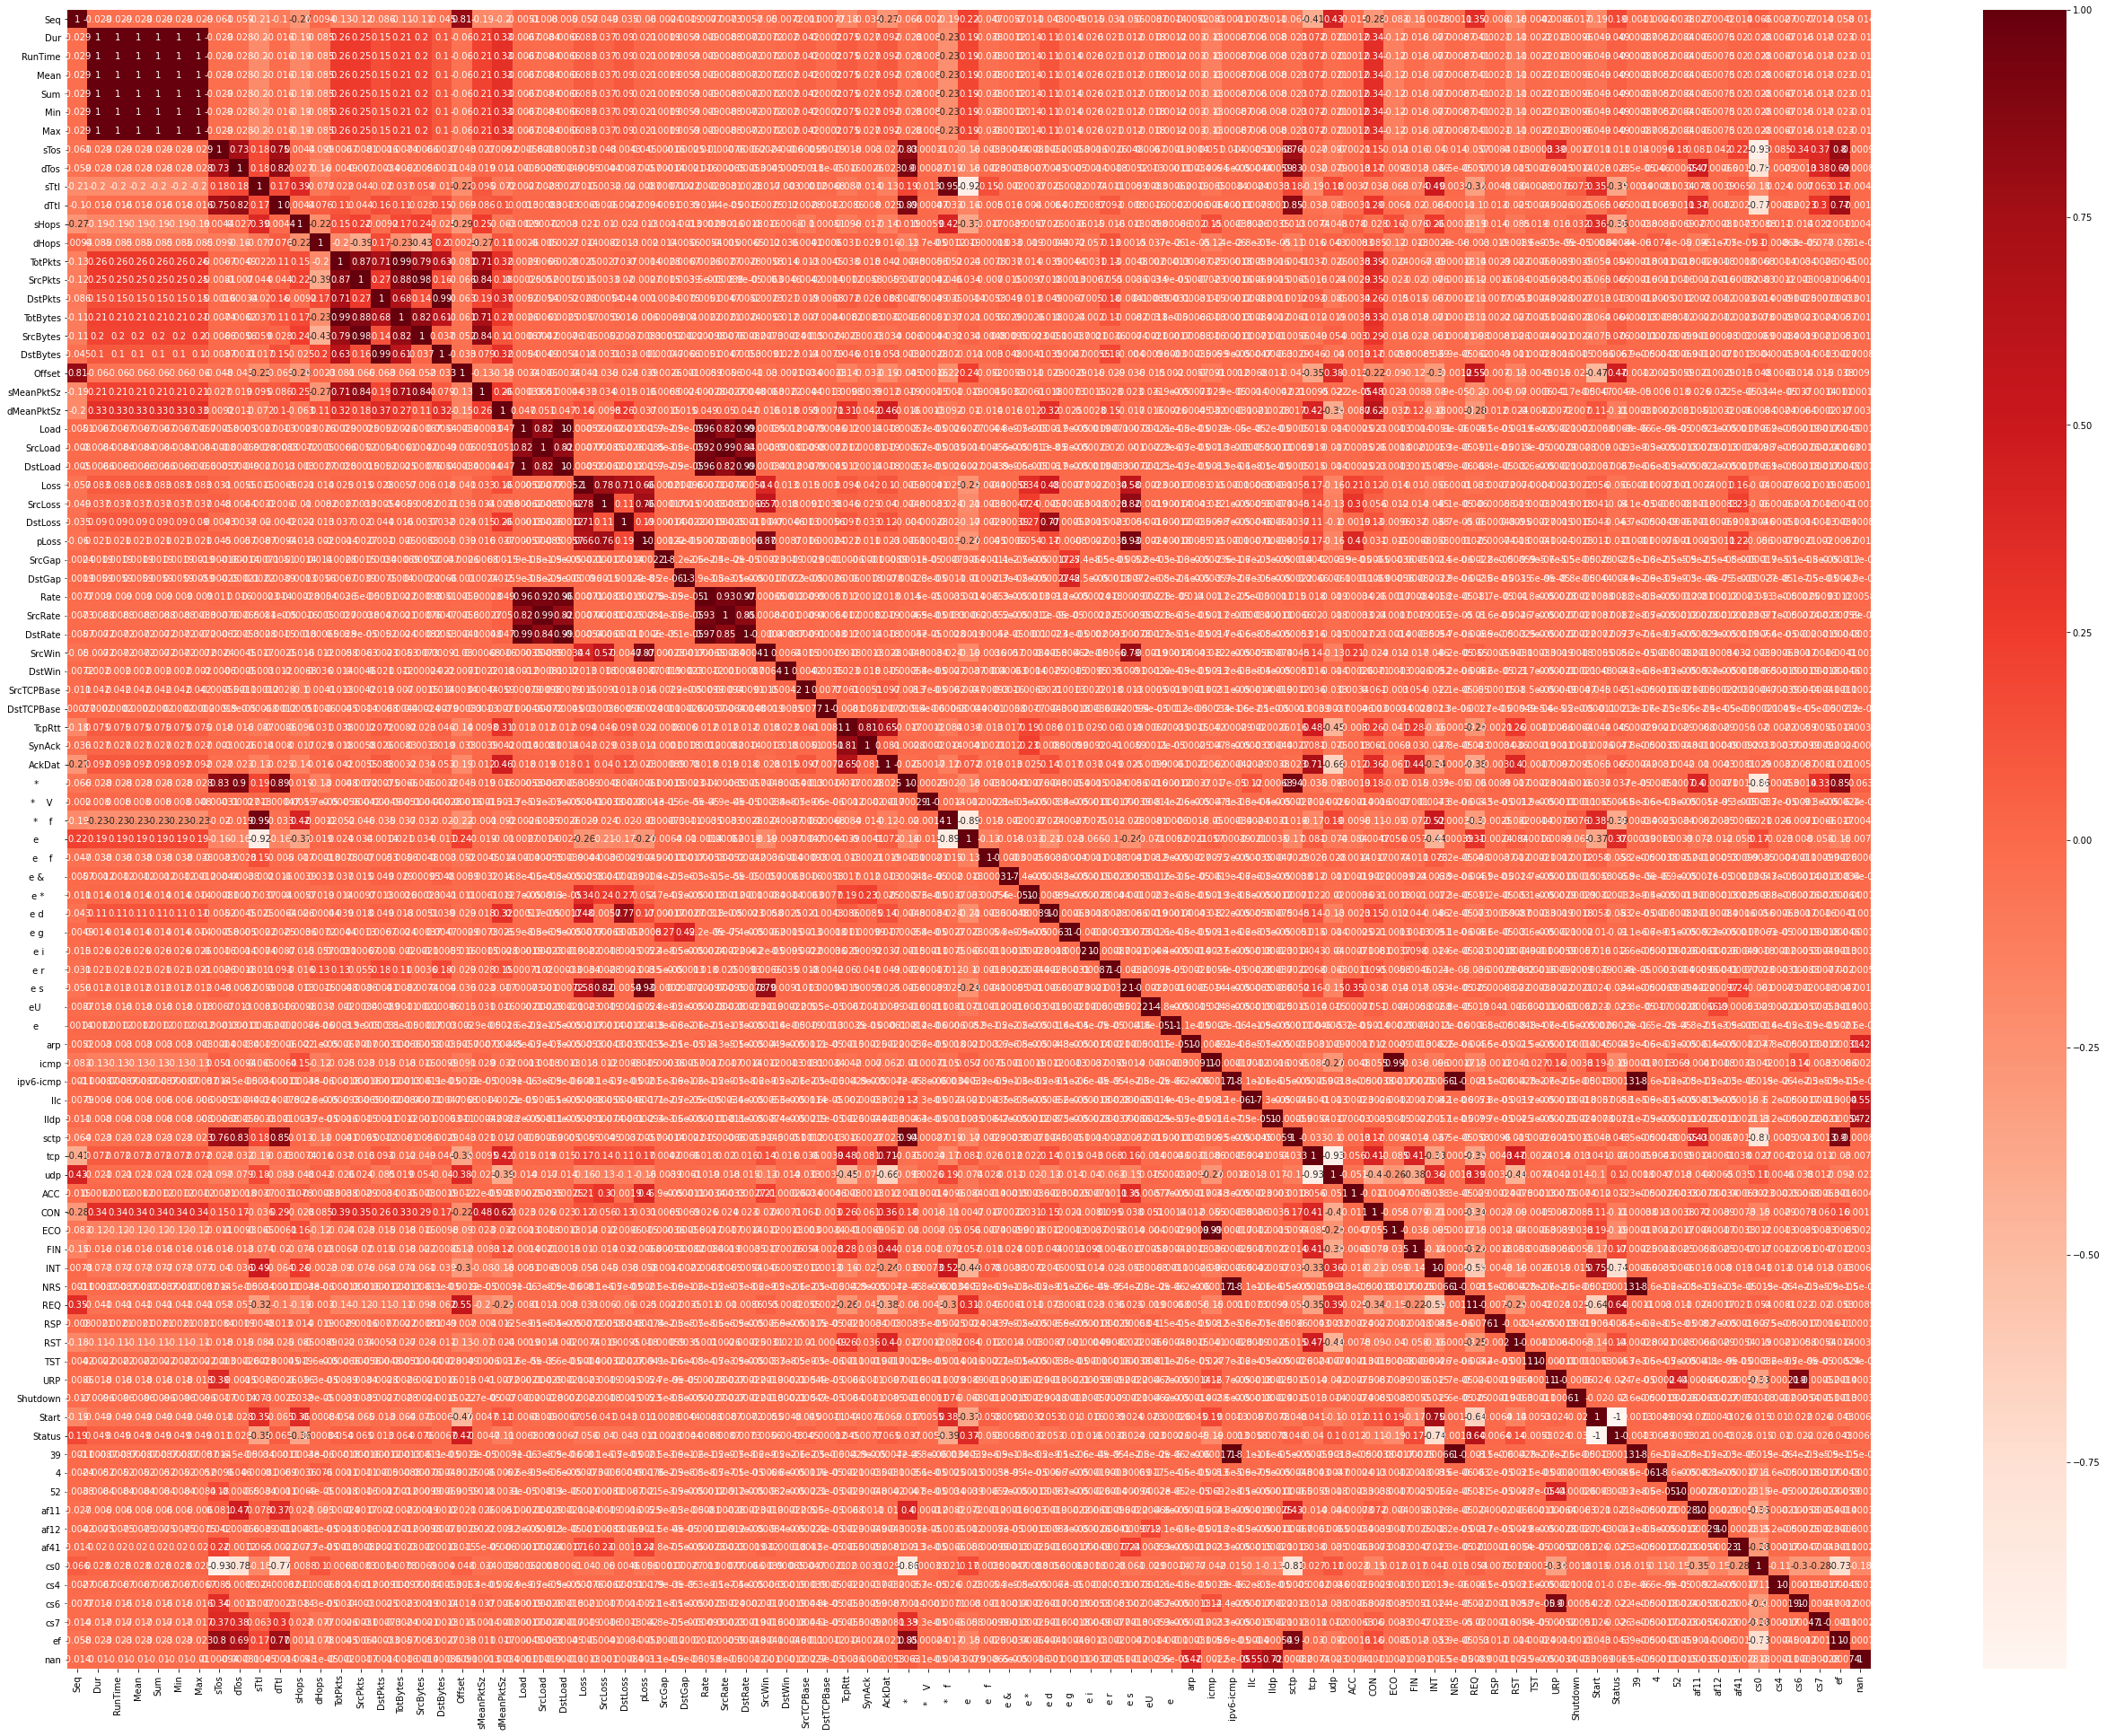

In [12]:
#Using Pearson Correlation
plt.figure(figsize=(45, 34))
cor = train_data.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if  abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features = correlation(train_data, 0.90)
len(set(corr_features))

23

In [15]:
corr_features

{' *    f   ',
 ' e        ',
 ' e s      ',
 '39',
 'DstBytes',
 'DstLoad',
 'DstRate',
 'ECO',
 'Max',
 'Mean',
 'Min',
 'NRS',
 'Rate',
 'RunTime',
 'SrcBytes',
 'SrcRate',
 'Status',
 'Sum',
 'TotBytes',
 'cs0',
 'ef',
 'sctp',
 'udp'}

In [16]:
import pandas
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)

In [17]:
print(train_data[["DstBytes","DstLoad","39"," *    f   "," e        "," e s      ",'DstRate','ECO','Max','Mean','Min','NRS','Rate','RunTime','SrcBytes','SrcRate','Status','Sum','TotBytes','cs0','ef','sctp','udp']].corr())

            DstBytes   DstLoad        39   *    f      e           e s        \
DstBytes    1.000000  0.005372 -0.000069   -0.020202   -0.011026   -0.004007   
DstLoad     0.005372  1.000000 -0.000009   -0.002618    0.002696   -0.000718   
39         -0.000069 -0.000009  1.000000   -0.000344    0.000389   -0.000094   
 *    f    -0.020202 -0.002618 -0.000344    1.000000   -0.885187   -0.027686   
 e         -0.011026  0.002696  0.000389   -0.885187    1.000000   -0.242921   
 e s       -0.004007 -0.000718 -0.000094   -0.027686   -0.242921    1.000000   
DstRate     0.005279  0.992909 -0.000010   -0.002829    0.001855   -0.000775   
ECO        -0.009763 -0.001286 -0.000169   -0.049569    0.055998   -0.013603   
Max         0.099825 -0.006643 -0.000875   -0.231719    0.188141    0.011820   
Mean        0.099825 -0.006643 -0.000875   -0.231719    0.188141    0.011820   
Min         0.099825 -0.006643 -0.000875   -0.231719    0.188141    0.011820   
NRS        -0.000069 -0.000009  1.000000

In [18]:
train_data = train_data.drop(columns=[' *    f   ', 'DstLoad', 'DstRate','Load','NRS','ipv6-icmp','RunTime','Min','Sum','Max','Dur','ef','ECO','udp','SrcPkts','TotPkts','Start'])

In [19]:
X_train = train_data.drop("Attack Type",1)   #Feature Matrix
y_train = train_data["Attack Type"]          #Target Variable

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

In [21]:
selector = SelectKBest(f_classif, k=25).fit(X_train,y_train)

selected_features_df = pd.DataFrame({'Features':list(X_train.columns),'Scores':selector.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)
#X_new = selector.transform(X)
#scores = selector.scores_

,Features,Scores
49,tcp,1.460108e+06
30,AckDat,2.833009e+05
6,sHops,1.598020e+05
0,Seq,5.229134e+04
56,RST,5.089445e+04
28,TcpRtt,4.701748e+04
54,REQ,4.452106e+04
14,dMeanPktSz,4.157258e+04
12,Offset,3.884409e+04
51,CON,3.744856e+04


In [27]:
print(selected_features_df.values)

[['Seq' 52291.33694741989]
 ['Mean' 15394.601345580028]
 ['sTos' 792.7368814503186]
 ['dTos' 585.691892216363]
 ['sTtl' 24115.2224787474]
 ['dTtl' 1839.8701017065089]
 ['sHops' 159802.03959667607]
 ['dHops' 2.275738174609559]
 ['DstPkts' 1236.7793854209585]
 ['TotBytes' 1587.4088391385026]
 ['SrcBytes' 1606.2625899420993]
 ['DstBytes' 433.93820466920573]
 ['Offset' 38844.08934168155]
 ['sMeanPktSz' 4183.548600064223]
 ['dMeanPktSz' 41572.58404851459]
 ['SrcLoad' 53.74600945173669]
 ['Loss' 1954.1437063918347]
 ['SrcLoss' 561.0550858510514]
 ['DstLoss' 2625.5890810510796]
 ['pLoss' 865.806577018137]
 ['SrcGap' 0.8569229524319141]
 ['DstGap' 5.064485812517305]
 ['Rate' 48.0426883935426]
 ['SrcRate' 54.36000106249591]
 ['SrcWin' 912.6397071943463]
 ['DstWin' 144.47732275137463]
 ['SrcTCPBase' 6592.899206764721]
 ['DstTCPBase' 3.085840338123549]
 ['TcpRtt' 47017.4771399972]
 ['SynAck' 821.1572286596323]
 ['AckDat' 283300.9036622893]
 [' *        ' 680.4646925426888]
 [' *    V   ' 3.283960

In [ ]:
df = df.drop(columns=[' *    f   ', 'DstLoad', 'DstRate','Load','NRS','ipv6-icmp','RunTime','Min','Sum','Max','Dur','ef','ECO','udp','SrcPkts','TotPkts','Start'])

In [ ]:
df = df.drop(columns=['DstPkts', 'cs0', 'SrcWin','pLoss','SynAck','sTos',' e s      ',' *        ','sctp','dTos','SrcLoss','DstBytes',' e    f   ',' e r      ','ACC','DstWin','af11',' eU       ','URP','Shutdown',' e i      ','cs6','cs7','af41','SrcRate','SrcLoad','TST','Rate',' e g      ','nan','af12','52',' e *      ','lldp','cs4','4','RSP','llc',' e &      ','arp','DstGap',' *    V   ','DstTCPBase','dHops','SrcGap','e        ','39'])

In [ ]:
df.to_csv("/Users/sehan/Documents/Data_Collection-26-08/multitop25.csv", header=df.columns)

In [2]:
top25 = pd.read_csv (r'/Users/sehan/Documents/Data_Collection-26-08/multitop25.csv')
display(top25)

,Unnamed: 0,Seq,Mean,sTtl,dTtl,sHops,TotBytes,SrcBytes,Offset,sMeanPktSz,...,e,e d,icmp,tcp,CON,FIN,INT,REQ,RST,Status
0,0,1,0.000000,58.0,59.0,6.0,98,98,128,98.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,0.000000,58.0,59.0,6.0,98,98,232,98.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,4.998020,117.0,64.0,11.0,249093,244212,336,1245.979614,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,4,4.998037,117.0,64.0,11.0,221712,216245,440,1326.656494,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,5,4.999453,117.0,64.0,11.0,280216,275723,544,1351.583374,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,1215885,1,0.000000,252.0,255.0,4.0,200,102,190300,102.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1215886,1215886,3,0.235607,255.0,250.0,1.0,3056,290,190392,96.666664,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1215887,1215887,764,0.099927,64.0,114.0,0.0,252,160,190496,80.000000,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1215888,1215888,3,1.307852,255.0,250.0,1.0,596,306,190704,102.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


/Users/sehan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


KeyboardInterrupt: 